In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from da.l63 import gen_l63
from da.scheme import rk4, euler

In [40]:
def plot_lorenz63(result):
    result = np.array(result)

    # 摂動を加えた20番目の要素をplot
    fig1, ax1 = plt.subplots()
    ax1.plot(result[:, 0], label="x", lw=0.2)
    ax1.plot(result[:, 1], label="y", lw=0.2)
    ax1.plot(result[:, 2], label="z", lw=0.2)
    ax1.set_xlabel('t')
    ax1.set_ylabel('$ x $')
    ax1.legend()
    ax1.set_title('plot components')

    # 1,2,3番目の要素を3次元plot
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(projection='3d')
    ax2.plot(result[:, 0], result[:, 1], result[:, 2], lw=0.2)
    ax2.set_xlabel('$x_1$')
    ax2.set_ylabel('$x_2$')
    ax2.set_zlabel('$x_3$')
    # plt.title('first three components of Lorenz96')
    
    
    plt.show()

 # Lorenz63の計算

In [41]:
# params
s = 10
b = 8/3
r = 28

# dt: 時間刻み
dt = 0.01

# N: 時間ステップ数
N = 360*20*2


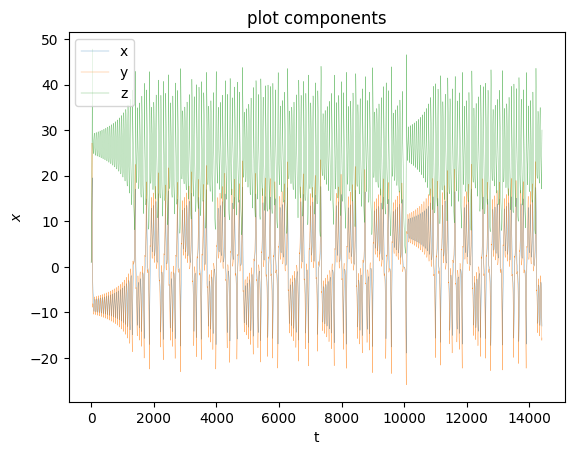

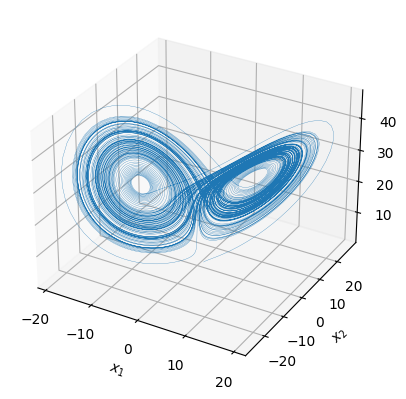

(14400, 3)
(1440, 3)


In [45]:
# 初期値の設定
x0 = np.array([1., 1., 1.])

lorenz = gen_l63(s, r, b)
# 任意のスキームでLorenz63を計算，plotする．
# 引数: scheme(f, t, x, dt) -> x(t+dt)
def simulate_lorenz63(x0, dt, N, scheme, plot=True):
    result = np.zeros((N,len(x0)))
    x = x0
    result[0] = x[:]

    for n in range(1,N):
        t = n*dt
        x = scheme(lorenz, t, x, dt)
        result[n] = x[:]
        
#  plot
    if plot:
        plot_lorenz63(result)

    return result


x = simulate_lorenz63(x0, dt, N, rk4)
print(x.shape)

x_true = x[len(x)//2:][::5] # 1年分を捨て，6h毎に取り出す
print(x_true.shape)

np.save(f"x_true_l63", x_true)

In [46]:
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
from matplotlib.colors import to_hex
pio.renderers.default = 'notebook'

n_colors = 10
pallet_name = "ch:s=-.2,r=.6" # ["rocket_r", "ch:s=-.2,r=.6"]


# plot
colors = sns.color_palette(pallet_name, as_cmap=False, n_colors=n_colors)
data = []
for i in range(10):
    color = to_hex(colors[i])
    X, Y, Z = x[i*len(x)//10:(i+1)*len(x)//10].T
    data.append(go.Scatter3d(x=X, y=Y, z=Z, mode='markers', marker=dict(size=0.3, color=color)))

# add data
fig = go.Figure(data=data)
fig.update_layout(
    width=400,
    height=400,
    showlegend=False,
    scene = dict(
        xaxis = dict(visible=False),
        yaxis = dict(visible=False),
        zaxis =dict(visible=False)
        )
    )
fig.show()

## 観測

In [47]:
x_true = np.load("x_true_l63.npy")
np.random.seed(0)
noise = np.random.normal(loc=0, scale=1, size=x_true.shape) # R = I
x_obs = x_true + noise
print(x_obs.shape)

np.save("x_obs_l63", x_obs)

(1440, 3)


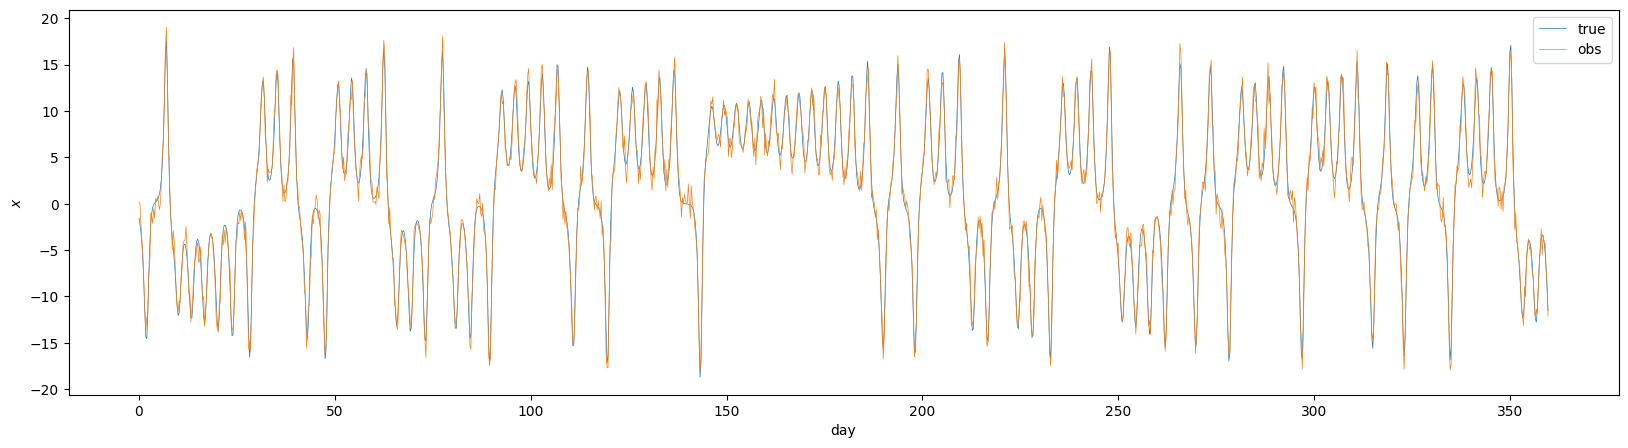

In [48]:
dates = [time/4 for time in range(1440)]
fig1, ax1 = plt.subplots(figsize=(20,5))
ax1.plot(dates, x_true[:, 0], '-', label='true', lw=0.5)
ax1.plot(dates, x_obs[:, 0],'-', label='obs', lw=0.5)
ax1.set_xlabel('day')
ax1.set_ylabel('$x $')
# plt.title('20th component vs. time')
_ = plt.legend()



(0.0, 2.0)

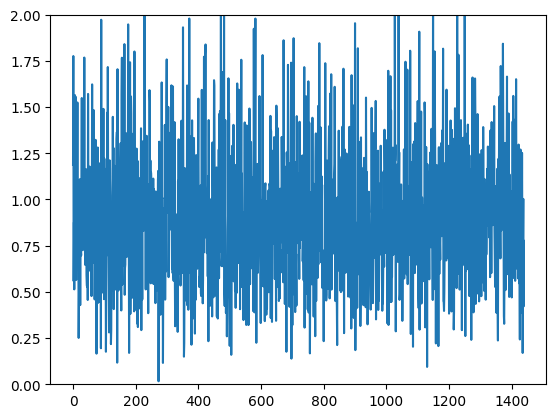

In [49]:
from da.visualize import plot_loss
from da.loss import loss_rms

plot_loss(x_true, x_obs, loss_rms)
plt.ylim([0, 2])